In [3]:
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
import numpy as np
# Datenimport
dat = []
with open("lichtkurve.txt","r") as file:
    for lines in file:
        dat.append([float(lines.split()[0]),float(lines.split()[1])])

data = np.array(dat)
print(len(data[:,0]))

200


In [5]:
import pandas as pd
data = pd.read_csv("ag_decay.txt",header=None,sep='\t')
data = data.to_numpy()


In [12]:
dev = np.sqrt(data[:,1])
def fit_func(v):
    result = 0
    for i in range(120):
        result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
    if np.isinf(result):
        result = np.exp(200)
    elif np.isnan(result):
        result = np.exp(200)
    elif v[4]<0:
        result += np.exp(-7*v[4])+np.exp(7)
    return result
def der_ff(v):
    storage=np.zeros(5)
    for i in range(120):
        storage[0]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))*2/dev[i]/dev[i] 
        storage[1]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])*v[0]* np.exp(-v[1]* i*5)*(- i*5+5* (i+1)* np.exp(-v[1]*5))*2/dev[i]/dev[i] 
        storage[2]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))*2/dev[i]/dev[i] 
        storage[3]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])*v[2]* np.exp(-v[3]* i*5)*(- i*5+5* (i+1)* np.exp(-v[3]*5))*2/dev[i]/dev[i] 
        storage[4]+=(v[0]* np.exp(-v[1]* i*5)*(1- np.exp(-v[1]*5))+v[2]* np.exp(-v[3]* i*5)*(1- np.exp(-v[3]*5))+v[4]- data[i][1])*2/dev[i]/dev[i] 
    if v[4]<0:
        storage[4] -=7*np.exp(-7*v[4])
    return storage

def fit_func2(v):
    result = 0
    for i in range(120):
        result += (v[0]*v[1]*5*np.exp(-v[1]*i*5)+v[2]*5*np.exp(-v[3]*i*5)*v[3]+v[4]-data[i,1])**2/dev[i]**2
    if np.isinf(result):
        result = np.exp(200)
    elif v[4]<0:
        result += np.exp(-7*v[4])
    return result

def der_ff2(v):
    storage=np.zeros(5)
    for i in range(120):
        storage[0]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)* np.exp(-v[1]* i*5)*v[1]*10/dev[i]/dev[i] 
        storage[1]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)*v[0]* np.exp(-v[1]* i*5)*(1-5*i*v[1])*10/dev[i]/dev[i] 
        storage[2]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)* np.exp(-v[3]* i*5)*v[3]*10/dev[i]/dev[i] 
        storage[3]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)*v[2]* np.exp(-v[3]* i*5)*(1-5*i*v[3])*10/dev[i]/dev[i] 
        storage[4]+=(v[0]* np.exp(-v[1]* i*5)*v[1]+v[2]* np.exp(-v[3]* i*5)*v[3]+v[4]/5- data[i][1]/5)*10/dev[i]/dev[i] 
    return storage


__________________________________________________ 0.4% GA is running...

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1331/1754766154.py:5: RuntimeWarning: invalid value encountered in double_scalars
  result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2


 The best solution found:                                                                           
 [inf inf inf inf inf]

 Objective function:
 7.225973768125749e+86


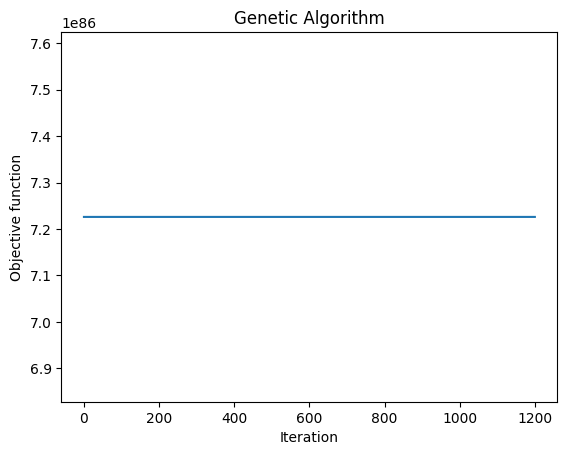

In [13]:
from copy import deepcopy
from scipy.optimize import minimize
# die ch^2 funktion
def fit_function2(x):
    n = len(x)
    a = x[0]*10
    b= x[1]*100
    amp = x[2::3]*100
    per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
    phi = x[4::3]*np.pi*2
    fun = 0
    for j in range((n-2)//3):
        fun = deepcopy(fun)+amp[j]*np.sin(2*np.pi/per[j]*data[:,0]+phi[j])
    fun += a*data[:,0]+b
    return np.sum((fun-data[:,1])**2/25)

sin_numb =4
# boundary conditions
bs = np.zeros((2+3*sin_numb,2))
for i in range(bs.shape[0]):
    bs[i,:]=np.array([0,1])

boundary = np.zeros((5,2))
for i in range(5):
    boundary[i,1] = np.inf
algorithm_param = {'max_num_iteration': 1200,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.04,\
                   'crossover_probability': 0.6,\
                   'parents_portion': 0.35,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model = ga(fit_func,5,variable_type='real',variable_boundaries=boundary,algorithm_parameters=algorithm_param)
model.run()

[1.01714644e-01 1.86719562e-01 6.69447370e-02 7.26852912e-04
 6.61137177e-01 1.14538891e-01 4.01743146e-01 5.50994696e-01
 1.96022811e-02 1.61248719e-01 9.83067989e-01 1.08262349e-01
 1.69872027e-01 7.44693980e-01]
182.92169463207074


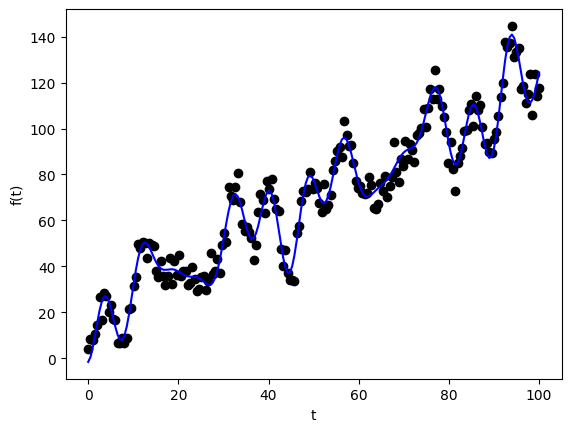

In [31]:
from copy import deepcopy
print(model.output_dict['variable'])
print(model.output_dict['function'])
# die angepasste funktion
def func(x):
    n = len(x)
    a = x[0]*10
    b= x[1]*100
    amp = x[2::3]*100
    per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
    phi = x[4::3]*np.pi*2
    fun = 0
    for j in range((n-2)//3):
        fun = deepcopy(fun+amp[j]*np.sin(2*np.pi/per[j]*data[:,0]+phi[j]))
    fun += a*data[:,0]+b
    return fun


import matplotlib.pyplot as plt


plt.figure()
ax = plt.axes()

ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.scatter(data[:,0],data[:,1],color="black")
ax.plot(data[:,0],func(model.output_dict['variable']),color='blue')
plt.show()



In [37]:
# die nächsten zwei zeilen generieren mir meine Latex tabellen
x = model.output_dict['variable']
a = x[0]*10
b= x[1]*100
amp = x[2::3]*100
per = x[3::3]*(50-(data[1,0]-data[0,0]))+(data[1,0]-data[0,0])
phi = x[4::3]*np.pi*2

In [38]:
print("&{:.3f}&{:.3f}&&&\\\\".format(a,b))
for i in range(1,5):
    print("{}&&&{:.3f}&{:.3f}&{:.3f}\\\\".format(i,amp[i-1],per[i-1],phi[i-1]))

&1.017&18.672&&&\\
1&&&6.694&0.538&4.154\\
2&&&11.454&20.388&3.462\\
3&&&1.960&8.484&6.177\\
4&&&10.826&8.911&4.679\\


In [2]:
# die zu fittenden Funktionen aus dem ersten Aufgabenteil
def fit1(x):
    r_sq = (x[0]-0.5)**2+(x[1]-0.5)**2
    return 1/(2+np.cos(9*np.pi*np.sqrt(r_sq))*np.exp(-r_sq/0.15))

def fit2(x):
    r1 = (x[0]-0.5)**2+(x[1]-0.5)**2
    r2 = (x[0]-0.6)**2+(x[1]-0.1)**2
    return 1/(0.8*np.exp(-r1/0.3**2)+0.879008*np.exp(-r2/(0.03)**2))

 The best solution found:                                                                           
 [0.49999929 0.50000118]

 Objective function:
 0.3333333334189801


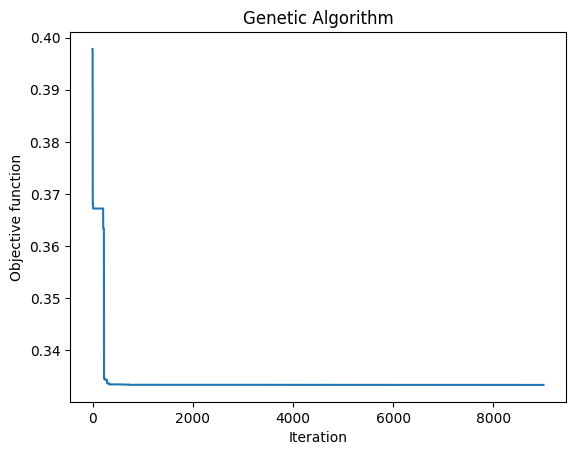

In [3]:
algorithm_param = {'max_num_iteration': 9000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
bounds = np.array([[-2,2],[-2,2]])
model = ga(fit1,2,variable_type='real',variable_boundaries=bounds,algorithm_parameters=algorithm_param)
model.run()
    